## 1CA Machine Learning

### Student Name: 
### Emily Cristina Herbas Luizaga (2023100)
### Mijail Fausto Blanco Vargas (2023012)
### Git Hub Link: https://github.com/mijailbv/Machine-Learning-Collaboration-CA

### PROBLEM STATEMENT

#### In the following CA project, we want to know the prediction of positive Covid cases registered in the dataset in Europe ("WHO Region"). In this dataset, we have different continents, countries and variables about Covid cases that will help us determine the predictions we want to know. The dataset was taken from kaggle analyzing different countries collecting data from the beginning of January 2020 until July 2020. To knoe the prediction of positive Covid cases is primordial since we need to know an stimate of positive covid cases for knowing how is the pandemy spreding around the world and this information could be useful for the countries to know if they need more medical attention, to have hospitals available or possible treatments for the people infected.

In [1]:
# Importing libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading datasets
df_cl = pd.read_csv('covid_19_clean_complete.csv')
df_world = pd.read_csv('worldometer_data.csv')

In [3]:
# Merging datasets
cov_df = df_cl.merge(df_world[["Country/Region", "Continent"]], on="Country/Region", how='left')
cov_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Continent
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,Asia
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,Africa


We loaded the datasets and merged the columns needed for the analysis.

## Characterization of the Covid Dataset

In [4]:
#Analysing the columns dtype and NaN values
cov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49068 entries, 0 to 49067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
 10  Continent       38164 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 4.5+ MB


We have 11 columns in the dataset in which 2 of them are continuous numerical variables, 4 are discrete numerical variables and 5 are categorical variables.

In [5]:
cov_df.shape

(49068, 11)

The shape of our dataset has 49068 rows and 11 columns and now let's proceed with Data cleaning before performing any Machine Learning modelling.

In [6]:
#Showing the insights of the numerical values
cov_df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In the dataset we can appreciate some details as latitude, and longitude which show us where is every country located, and a collection of confirmed, deaths, recovered, and active cases of Covid.

In [7]:
#Showing the insights of the categorical values
cov_df.describe(include='object')

,Province/State,Country/Region,Date,WHO Region,Continent
count,14664,49068,49068,49068,38164
unique,78,187,188,6,6
top,Australian Capital Territory,China,2020-01-22,Europe,Europe
freq,188,6204,261,15040,10528


In our categorical variables, we can see that we have 187 countries in our dataset, 78 provinces, 188 different dates, 6 WHO Region and 6 different continents 

## Data Cleaning

In [8]:
# Dropping duplicates
cov_df.drop_duplicates()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Continent
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,Asia
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,Africa
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,Asia
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,Asia


In [9]:
# Showing the shape of the dataframe after dropping duplicates
cov_df.shape

(49068, 11)

The number of rows didn't change after dropping duplicates, and this means that our data doesn't have duplicates inside and in the following code we are going to standardize the NaN values.

In [10]:
# Standarizing "NaN" values
missing_val = ["n.a.", "?", "NA", "n/a", "na", "--"]
cov_df = cov_df.replace(missing_val, pd.NA)

In [11]:
#Showing the percentage of NaN values in each column
NaN_per = (cov_df.isnull().sum()/len(cov_df))*100
NaN_per

Province/State    70.114943
Country/Region     0.000000
Lat                0.000000
Long               0.000000
Date               0.000000
Confirmed          0.000000
Deaths             0.000000
Recovered          0.000000
Active             0.000000
WHO Region         0.000000
Continent         22.222222
dtype: float64

As we can see the variable "Province/state" has around 70% of Null values present, and we decided to drop it since it would create bias and variance leading into bad predictions in our Machine Learning predictions.

In the column continent, as it is related to "WHO Region", we are going to annalyze the columns to see how similar they are.

In [12]:
# Dropping "Province/State and showing the unique values of "Continent"
cov_df.drop('Province/State', axis=1, inplace=True)
cov_df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Australia/Oceania', nan], dtype=object)

In [13]:
#Showing the unique values of "WHO Region"
cov_df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In the column "WHO Region", we have similar unique values; however, they are not the same for example in Eastern Mediterranean Regions could be included European and non/European countries, that is why we are going to replace the NaN-values as "Unknown"; this decission won't affect when we are annalyzing Europe as "WHO region".

In [14]:
cov_df['Continent'].fillna('Unknown', inplace=True)

In [15]:
cov_df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Continent
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,Asia
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,Asia
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,Asia


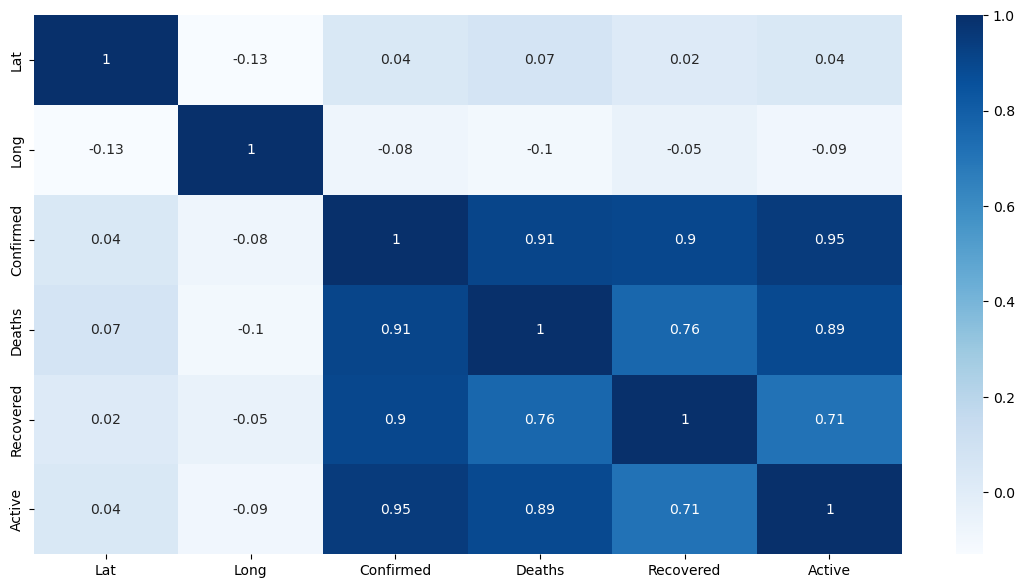

In [16]:
# Correlation matrix of Numerical values
correlation = cov_df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Blues');

## ANALYSIS OF THE STAGES OF COVID

The intention of generating the following graphs is to be able to visualize by region defined by the World Health Organization (WHO Region) the percentage of people in the different cases of Covid (Confirmed, Dead, Recovered and Active) in order to see which Region was the most affected.

## Confirmed Cases Charts

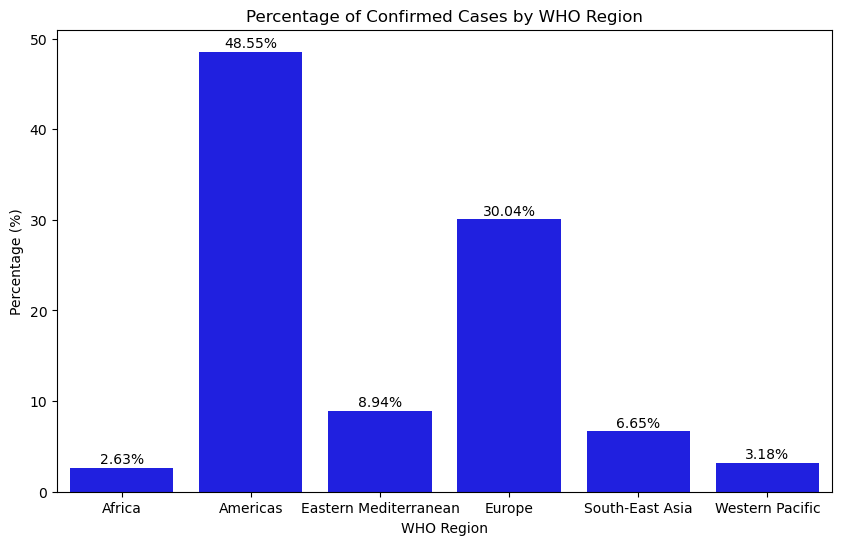

In [17]:
#Ploting the percentage of Confirmed Cases by Continent

conf_cases = cov_df.groupby('WHO Region')['Confirmed'].sum()

total = conf_cases.sum()

# Obteining the percentage
percentages_conf = (conf_cases / total) * 100

# Generating the plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=percentages_conf.index, y=percentages_conf.values, color='blue')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, f'{height:.2f}%', ha="center")

plt.title('Percentage of Confirmed Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Percentage (%)')
plt.show()

In the previous graph, we can observed that the Americas WHO Region has the highest number of confirmed cases with 48,55% followed by Europe with 30,04%. To identify which country or countries in both WHO Regions have the highest number of confirmed cases we will generate new bar charts.

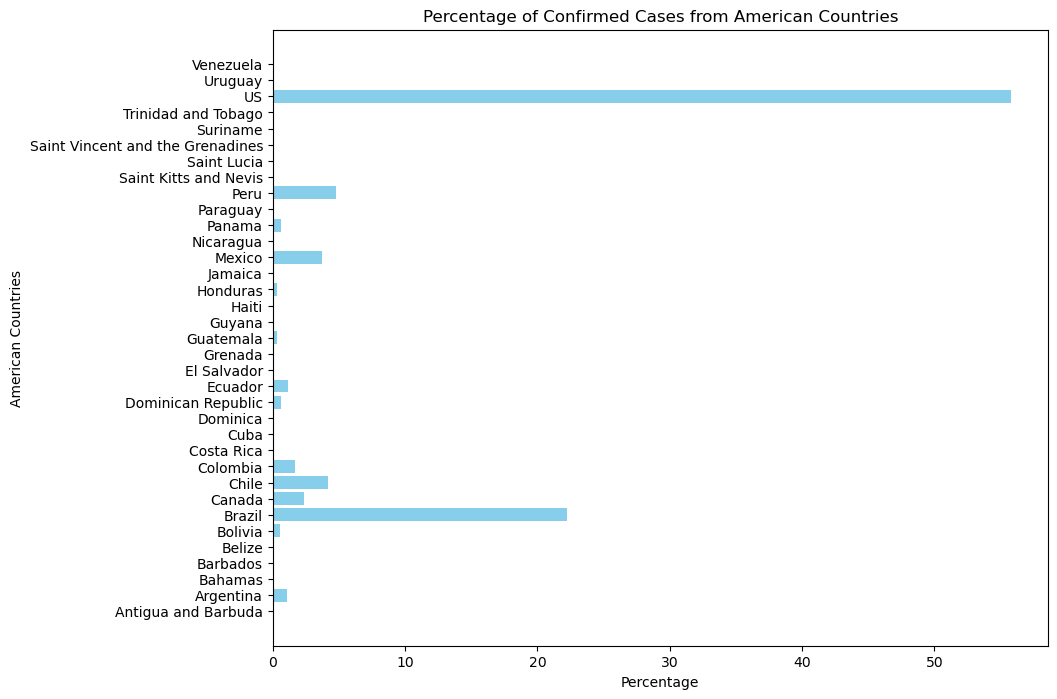

In [18]:
# Filtering the data for Americas from Continent column
Filter_Americas = cov_df[cov_df['WHO Region'] == 'Americas']

values_conf = Filter_Americas.groupby('Country/Region')['Confirmed'].sum()
total = values_conf.sum()

# Calculating the percentage
porcent_conf = (values_conf / total) * 100

# Ploting
plt.figure(figsize=(10,8))
plt.barh(porcent_conf.index, porcent_conf.values, color='skyblue')    
plt.title('Percentage of Confirmed Cases from American Countries')
plt.xlabel('Percentage')
plt.ylabel('American Countries')
plt.show()

We can observe that US with more than 55% and Brazil with around 22% has the highgest number of confirmed cases.


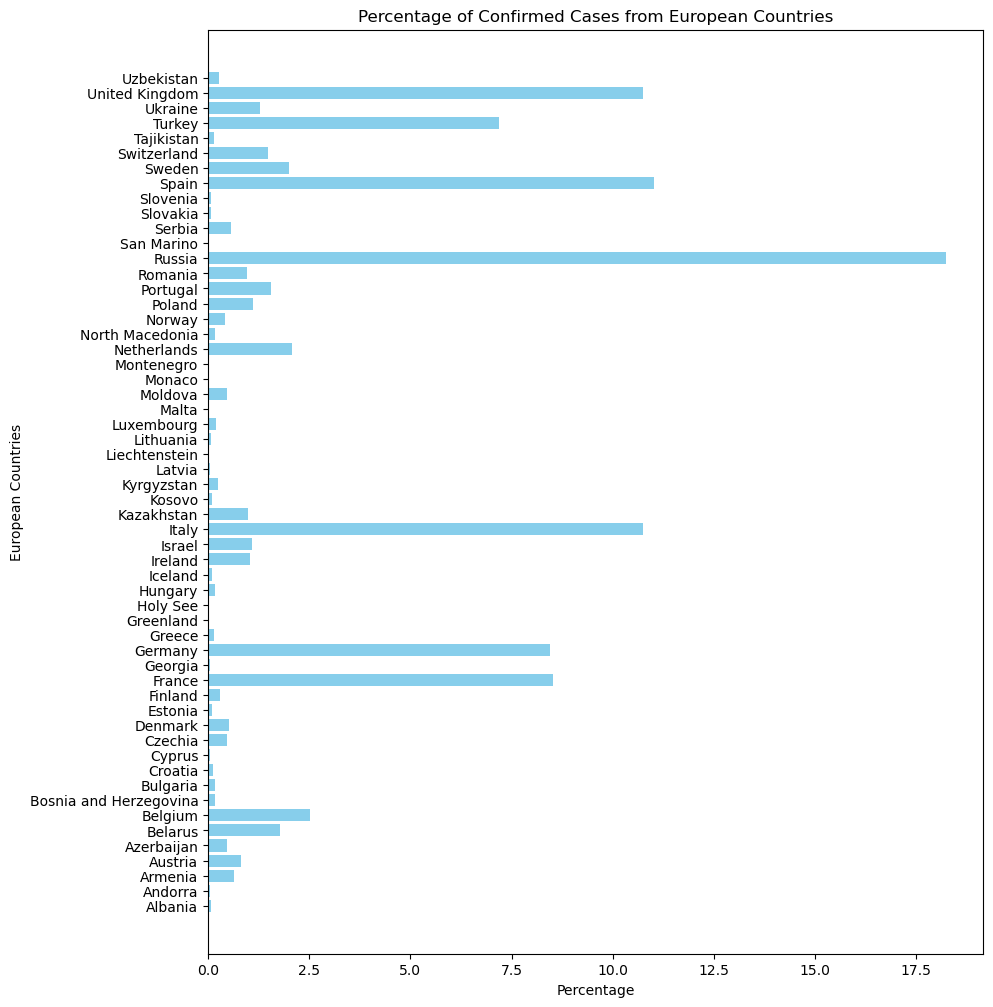

In [19]:
# Filtering the data for Americas from Continent column
Filter_Europe = cov_df[cov_df['WHO Region'] == 'Europe']

values_conf = Filter_Europe.groupby('Country/Region')['Confirmed'].sum()
total = values_conf.sum()

# Calculating the percentage
porcent_conf = (values_conf / total) * 100

# Ploting
plt.figure(figsize=(10,12))
plt.barh(porcent_conf.index, porcent_conf.values, color='skyblue')    
plt.title('Percentage of Confirmed Cases from European Countries')
plt.xlabel('Percentage')
plt.ylabel('European Countries')
plt.show()

We can observe that Russia with 17,5% has the highest percentage of confirmed cases followed by Spain, United Kingdom and Italy (with 11,5%).

## Death Cases Charts

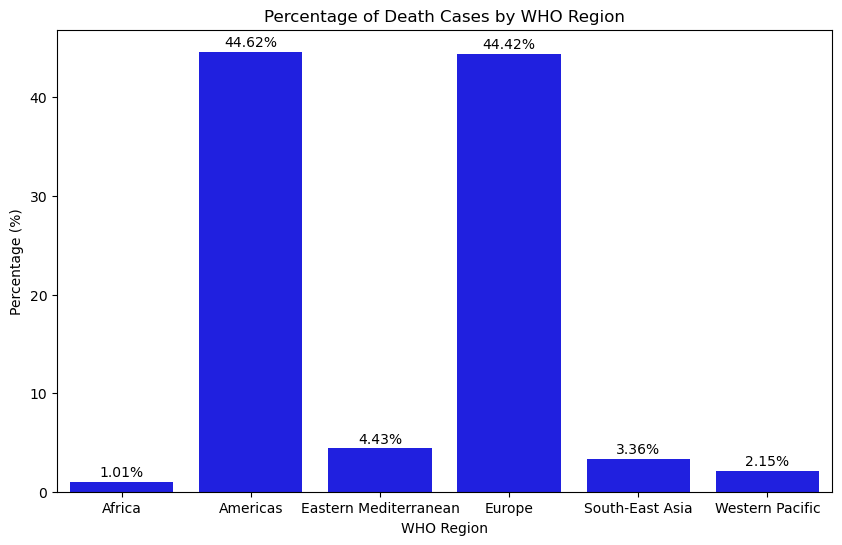

In [20]:
#Ploting the percentage of Death Cases by Continent

death_cases = cov_df.groupby('WHO Region')['Deaths'].sum()

total = death_cases.sum()

# Obteining the percentage
percentages_death = (death_cases / total) * 100

# Generating the plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=percentages_death.index, y=percentages_death.values, color='blue')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, f'{height:.2f}%', ha="center")

plt.title('Percentage of Death Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Percentage (%)')
plt.show()

In the previous graph, we can observed that the Americas with 44,62% and Europe with 44,42% have the highest number of death cases. To identify which country or countries in both WHO Regions have the highest number of death cases we will generate new bar charts.

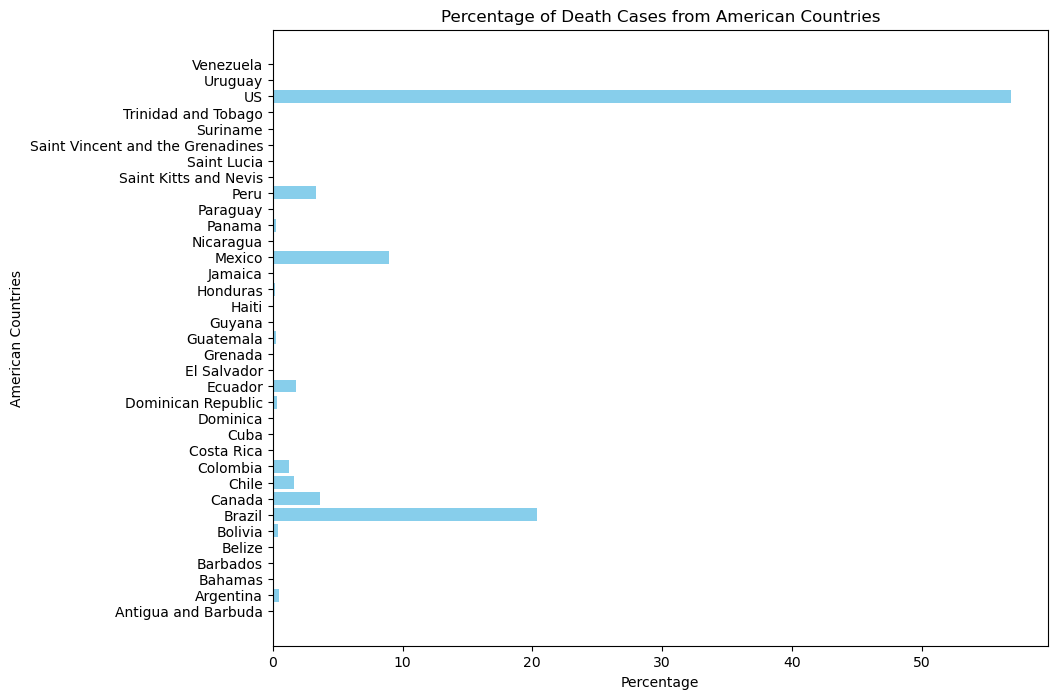

In [21]:
# Filtering the data for Europe from Continent column
Filter_Americas = cov_df[cov_df['WHO Region'] == 'Americas']

values_death = Filter_Americas.groupby('Country/Region')['Deaths'].sum()
total = values_death.sum()

# Calculating the percentage
porcent_death = (values_death / total) * 100

# Ploting
plt.figure(figsize=(10,8))
plt.barh(porcent_death.index, porcent_death.values, color='skyblue')    
plt.title('Percentage of Death Cases from American Countries')
plt.xlabel('Percentage')
plt.ylabel('American Countries')
plt.show()

We can see that the US with more than 55%  has the highest percentage of deaths followed by Brazil with 20%, this may be due to the fact that both countries have a larger population compared to the rest of the countries in the Americas.

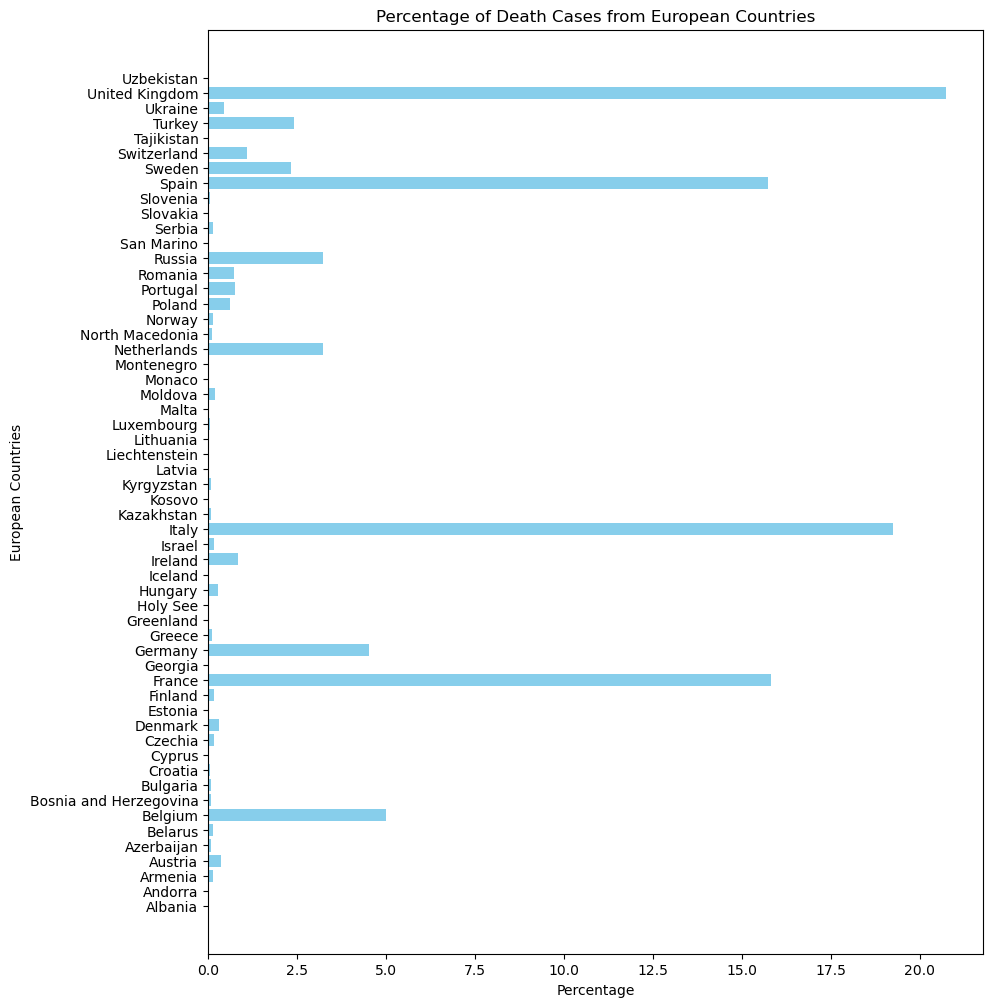

In [22]:
# Filtering the data for Europe from Continent column
Filter_Europe = cov_df[cov_df['WHO Region'] == 'Europe']

values_death = Filter_Europe.groupby('Country/Region')['Deaths'].sum()
total = values_death.sum()

# Calculating the percentage
porcent_death = (values_death / total) * 100

# Ploting
plt.figure(figsize=(10,12))
plt.barh(porcent_death.index, porcent_death.values, color='skyblue')    
plt.title('Percentage of Death Cases from European Countries')
plt.xlabel('Percentage')
plt.ylabel('European Countries')
plt.show()

In this case, we can observe that UK with a 20% has the highest number of COVID-related deaths, followed by Italy (around 18,5%), Spain (16.5%) and France (16,5%). This leads us to understand:

We can supossed that maybe this countries was not equipped to handle infected patients, as reflected in the fact that it enforced one of the longest home quarantines for its population but also we can see that the percentages are not as big as US and Brazil.

## Recovered Cases Charts

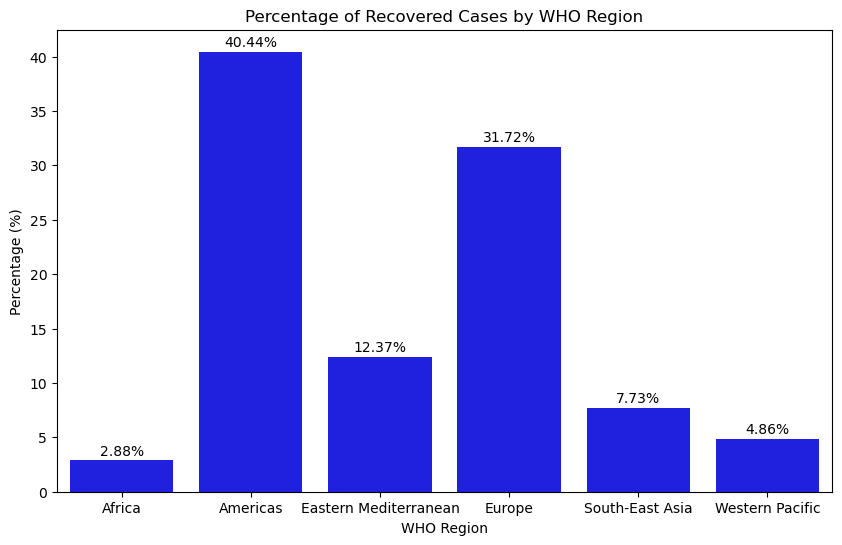

In [23]:
#Ploting the percentage of Recovered Cases by Continent

recov_cases = cov_df.groupby('WHO Region')['Recovered'].sum()

total = recov_cases.sum()

# Obteining the percentage
percentages_recov = (recov_cases / total) * 100

# Generating the plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=percentages_recov.index, y=percentages_recov.values, color='blue')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, f'{height:.2f}%', ha="center")

plt.title('Percentage of Recovered Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Percentage (%)')
plt.show()

In the previous graph we can observed that the Americas WHO Region has the highest number of Recovered cases with 40,44% followed by Europe with a 31,72%. To identify which country or countries in the Americas has the highest number of recovered cases, we will generate a new bar chart.

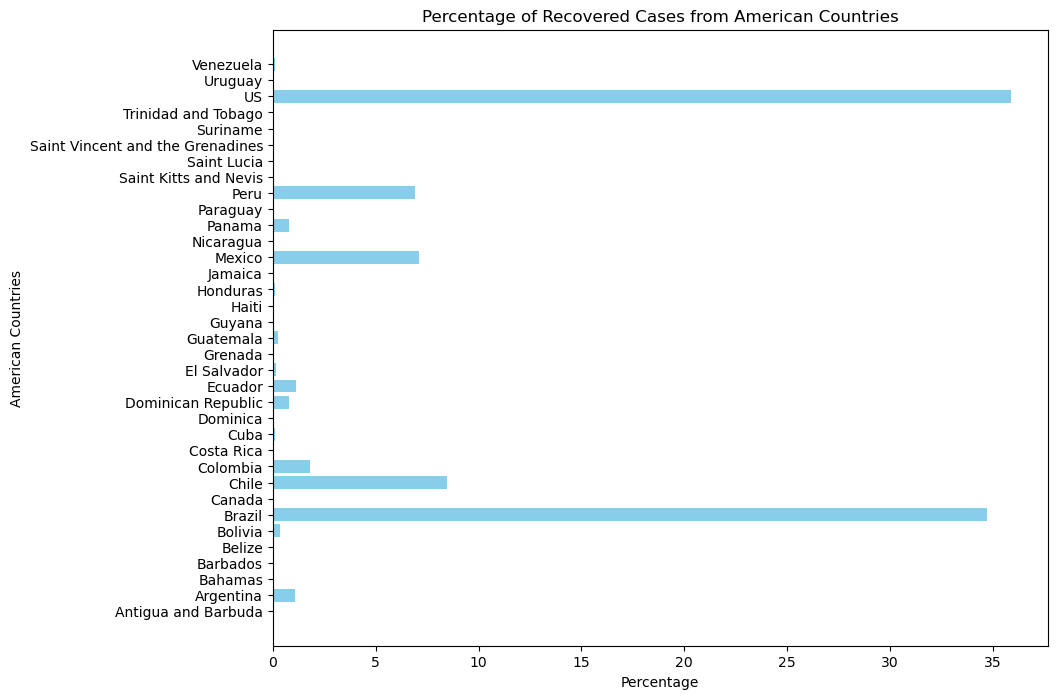

In [24]:
# Filtering the data for Americas from Continent column
Filter_Americas = cov_df[cov_df['WHO Region'] == 'Americas']

values_recov = Filter_Americas.groupby('Country/Region')['Recovered'].sum()
total = values_recov.sum()

# Calculating the percentage
porcent_recov = (values_recov / total) * 100

# Ploting
plt.figure(figsize=(10,8))
plt.barh(porcent_recov.index, porcent_recov.values, color='skyblue')    
plt.title('Percentage of Recovered Cases from American Countries')
plt.xlabel('Percentage')
plt.ylabel('American Countries')
plt.show()

In this case we can observe that US with 35% and Brasil with 34,8% have the highest percentage of cases Recovered.

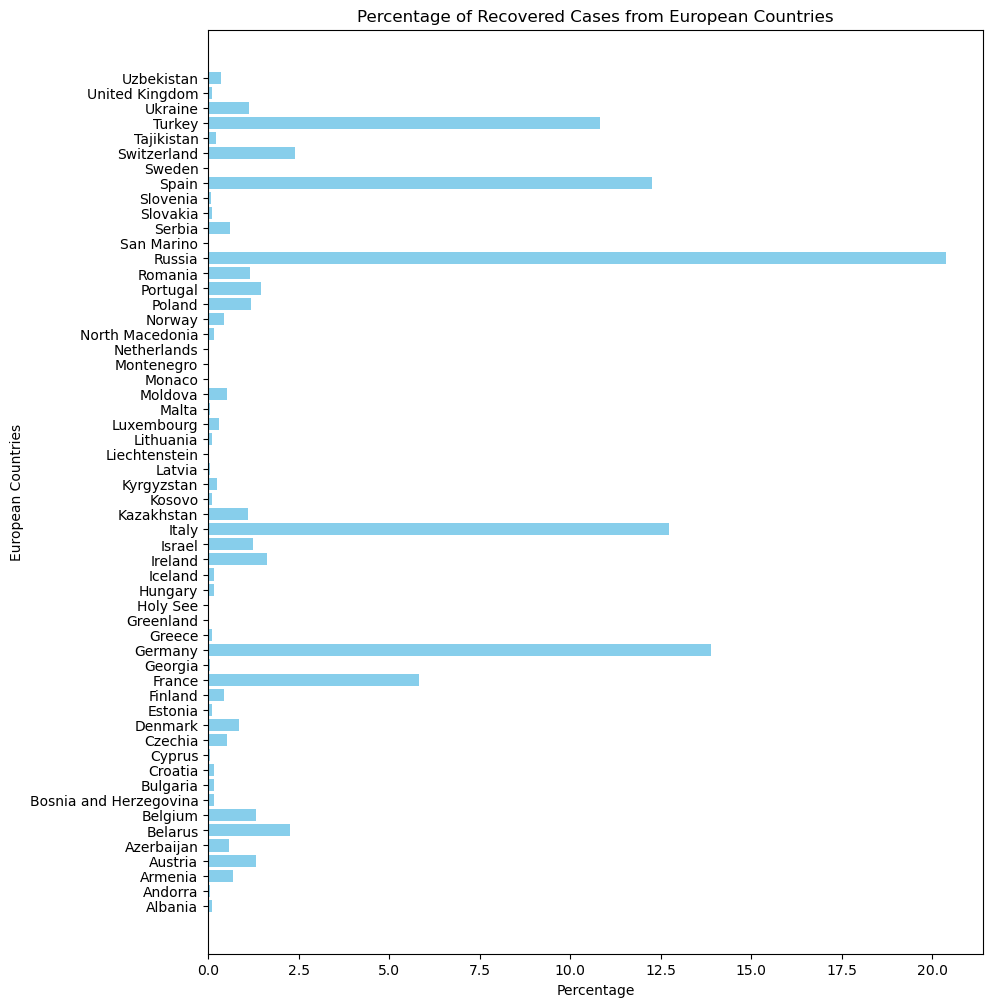

In [25]:
# Filtering the data for Americas from Continent column
Filter_Europe = cov_df[cov_df['WHO Region'] == 'Europe']

values_recov = Filter_Europe.groupby('Country/Region')['Recovered'].sum()
total = values_recov.sum()

# Calculating the percentage
porcent_recov = (values_recov / total) * 100

# Ploting
plt.figure(figsize=(10,12))
plt.barh(porcent_recov.index, porcent_recov.values, color='skyblue')    
plt.title('Percentage of Recovered Cases from European Countries')
plt.xlabel('Percentage')
plt.ylabel('European Countries')
plt.show()

We can see that Rusia has the highest percentage of recovered cases with a 20% followed by Germany (around 14%), Italy (12,5%), Spain (11,5%) and Turkey (11,5%)

## Active Cases Charts

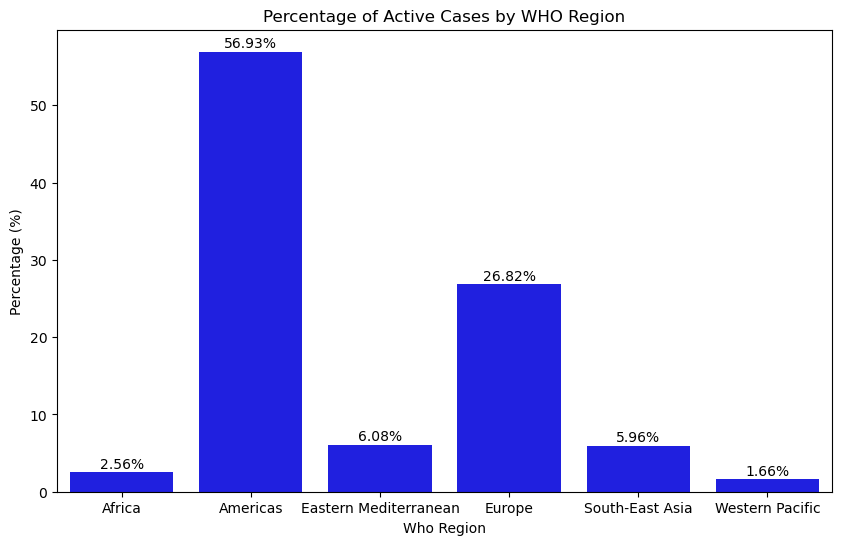

In [26]:
#Ploting the percentage of Active Cases by Continent

active_cases = cov_df.groupby('WHO Region')['Active'].sum()

total = active_cases.sum()

# Obteining the percentage
percentages_active = (active_cases / total) * 100

# Generating the plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=percentages_active.index, y=percentages_active.values, color='blue')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, f'{height:.2f}%', ha="center")

plt.title('Percentage of Active Cases by WHO Region')
plt.xlabel('Who Region')
plt.ylabel('Percentage (%)')
plt.show()

The Americas Who Region has the highets percentage of Active cases with 56,93%, although Europe had percentages very close to the Americas in the previous graphs, we can now see that the percentage of active cases is 26.82%, less than half of the cases in the Americas.
We could say that Europe at some point was able to manage Covid infections, a possible cause for the reduction in cases may be the long-term confinement that was imposed in some countries. 
To identify which country or countries in the Americas have the highest number of active cases we will generate a new bar chart.

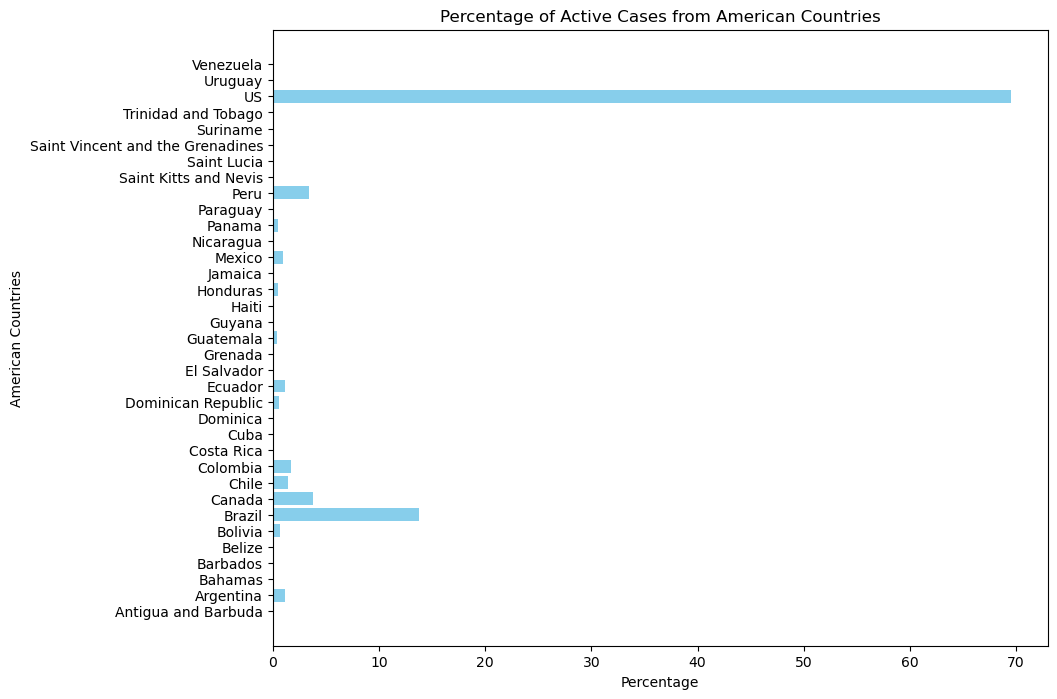

In [27]:
# Filtering the data for Americas from Continent column
Filter_Americas = cov_df[cov_df['WHO Region'] == 'Americas']

values_act = Filter_Americas.groupby('Country/Region')['Active'].sum()
total = values_act.sum()

# Calculating the percentage
porcent_act = (values_act / total) * 100

# Ploting
plt.figure(figsize=(10,8))
plt.barh(porcent_act.index, porcent_act.values, color='skyblue')    
plt.title('Percentage of Active Cases from American Countries')
plt.xlabel('Percentage')
plt.ylabel('American Countries')
plt.show()

We can see that the United States has the highest percentage of active cases at nearly 70%. This could mean:

* The population did not fully adhere to the precautionary measures implemented by the country.

* Due to its status as a major tourist destination, there may not have been strict restrictions on entry from other countries to avoid negatively impacting the country's economy.

* Disruptions to schools and businesses may have been kept to a minimum.

## Time Series Analysis of Confirmed cases in Europe (WHO Region)

In [28]:
# Separating the columns to be analyzed for time series and resetting index
covid_ts = cov_df[cov_df['WHO Region'] == 'Europe'].reset_index()
covid_ts.drop('index', axis=1, inplace=True)
covid_ts

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Continent
0,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe,Europe
1,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe,Europe
2,Armenia,40.0691,45.0382,2020-01-22,0,0,0,0,Europe,Asia
3,Austria,47.5162,14.5501,2020-01-22,0,0,0,0,Europe,Europe
4,Azerbaijan,40.1431,47.5769,2020-01-22,0,0,0,0,Europe,Asia
...,...,...,...,...,...,...,...,...,...,...
15035,United Kingdom,18.4207,-64.6400,2020-07-27,8,1,7,0,Europe,Unknown
15036,United Kingdom,21.6940,-71.7979,2020-07-27,99,2,36,61,Europe,Unknown
15037,United Kingdom,-51.7963,-59.5236,2020-07-27,13,0,13,0,Europe,Unknown
15038,France,46.8852,-56.3159,2020-07-27,4,0,1,3,Europe,Europe


In this data frame we are analyzing just the Europe WHO Region and we have 15040 rows and 10 columns. 

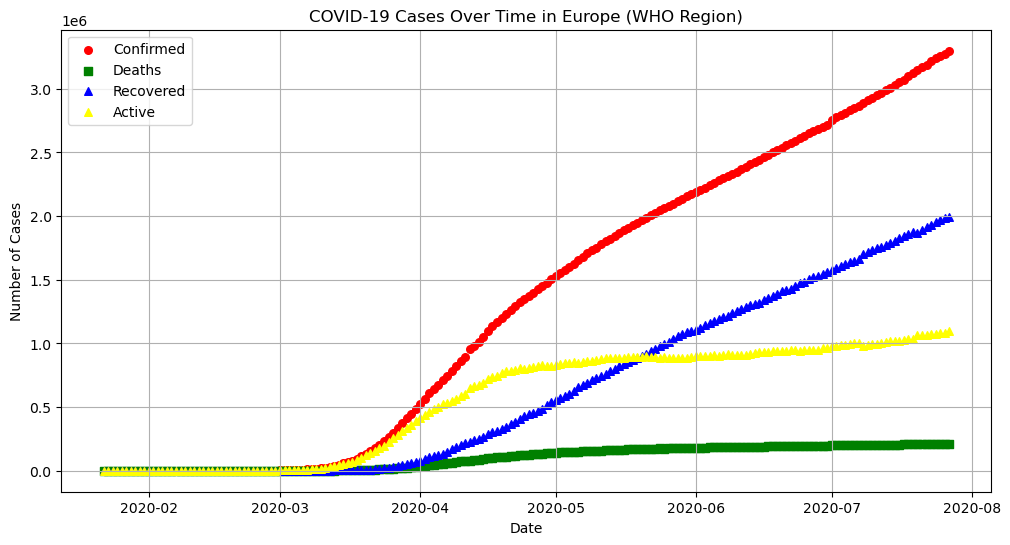

In [29]:
# Visualization of Covid-19 Cases Over Time in Europe
covid_EU = covid_ts.groupby('Date')['Confirmed','Deaths', 'Recovered', 'Active'].sum().reset_index()
covid_EU['Date'] = pd.to_datetime(covid_EU['Date'])

plt.figure(figsize=(12, 6))
plt.scatter(covid_EU['Date'], covid_EU['Confirmed'], label='Confirmed', color='red', marker='o', s=30)
plt.scatter(covid_EU['Date'], covid_EU['Deaths'], label='Deaths', color='green', marker='s', s=30)
plt.scatter(covid_EU['Date'], covid_EU['Recovered'], label='Recovered', color='blue', marker='^', s=30)
plt.scatter(covid_EU['Date'], covid_EU['Active'], label='Active', color='yellow', marker='^', s=30)
plt.title('COVID-19 Cases Over Time in Europe (WHO Region)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

In this plot we can see a positive tendency line in the confirmed cases, but also we can see how was the distribution of the Covid cases Over time in Europe according to our data time provided. We can see also that until march the cases were still around 0.

## Applying ARIMA Time Seires Model

In [30]:
# Loading libraries for time series plots, ACF and PACF
def plotds(xt, nlag = 60, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

The previous function generate plots of time series including ACF and PACF. Now, let's analyze the time series model with ARIMA since our data is reduced per months and we can see a clear increasing tendency line, it is better apply ARIMA instead of SARIMAX since our data is reduced in months and as we are analyzing Europe in general, we will need to aggregate all the confirmed cases in Europe according to the dates.

In [31]:
# Grouping according to the date, the confirmed cases of Covid in Europe
covid_ts = covid_ts.groupby('Date')['Confirmed'].sum().reset_index()

For applying ARIMA, first we need to add the date as an index in our dataframe

In [32]:
# Introducing the date in the correct format
covid_ts['Date'] = pd.to_datetime(covid_ts['Date'], format='%Y-%m-%d')
covid_ts.index = covid_ts['Date']
covid_ts.drop('Date', axis=1, inplace=True)
covid_ts.head()

,Confirmed
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,2
2020-01-25,3
2020-01-26,3


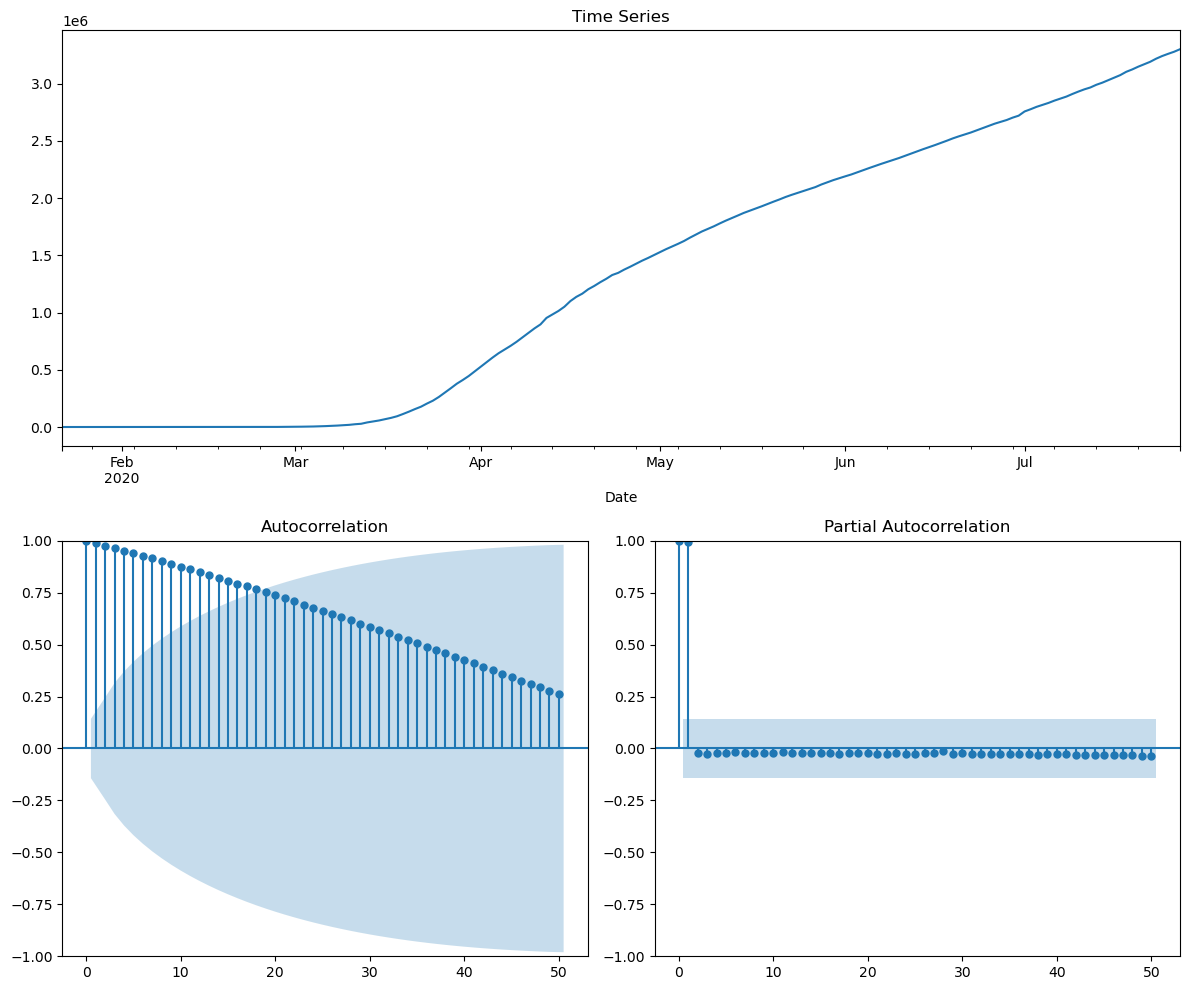

In [33]:
# Display plot of close column and Date index
plotds(covid_ts['Confirmed'], nlag = 60)

We did the previous plot to see if our data is shown as stationary, but we can see that our data is not stationary since it has an increasing trend in the first visualization where we see the months vs confirmed Covid cases, we can also see a decreasing autocorrelation and analyzing the partial autocorrelation, we can see around the first 2 lags are around 1 in the y-axes, but then we can see the following lags in negative values close to zero and we can see that there is a relationship present there.

In [34]:
# Calculating the mean and variance values of first 110 rows and afterwards
mean1, mean2 = covid_ts.iloc[:110].Confirmed.mean(), covid_ts.iloc[110:].Confirmed.mean()
var1, var2 = covid_ts.iloc[:110].Confirmed.var(), covid_ts.iloc[110:].Confirmed.var()
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 473744.545455, mean2 = 2522665.294872
variance1 = 361015356235.002563, variance2 = 190568433538.911896


We can see that the variance is changing between the first 110 rows and afterwards and we can say that the data is not stationary, and to confirm this using a mathematical method, we will use Dickey Fuller Test

For the Dickey Fuller test, we stated the next HypothesIs to compare that is the null hypothesis ($H_0$), and the alternative one ($H_A$):


($H_0$): The time series is non-stationary

($H_A$): The time series is stationary

The significance level stablished by default is 0.05

In [35]:
adf_result = adfuller(covid_ts.Confirmed.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -0.190170
p-value: 0.939683


Applying Dickey Fuller Test, we can see that the p value is more than 0.05; so, we reject the null hypothesis, and we can say that our dataset is non-stationary.

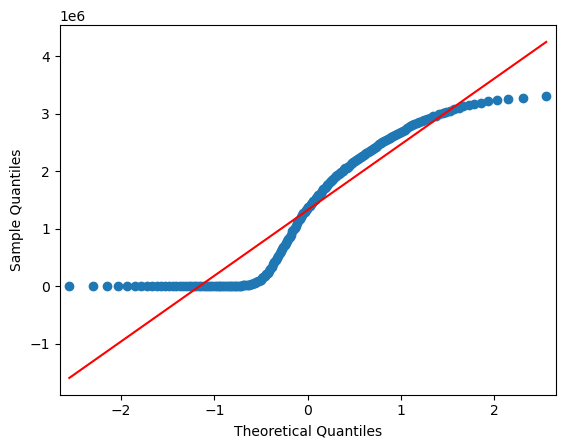

In [36]:
# Showing the qqplot for 'Confirmed' cases of Covid
x = sm.qqplot(covid_ts['Confirmed'], line = 's')

We are looking the quartile distribution in the previous graphic, and it is based in the quartiles of the x-axes in which at the beginning we can see many values that remain constant close to zero and then start increasing.

As our data does't show too much seasonality, let's apply ARIMA model in the dataset to compare the values and make it stationary

## ARIMA Time Series Model splitting 15% for testing and 85% for training

In [37]:
from statsmodels.tsa.arima.model import ARIMA
train_size = int(len(covid_ts) * 0.85)
train, test = covid_ts[:train_size], covid_ts[train_size:]
model = ARIMA(train['Confirmed'], order = (1, 1, 0))
results_AR = model.fit()

We are gonna analyze the recovered cases adding p,d, and q in which p is 1 which means the autoregression, 1 as q that is the difference and 0 as moving average, and the next function finds how many differences we should apply to make the data stationary for our ARIMA model.

In [38]:
#Applying function to find the number of differences to apply to make the data stationary
analysis = train['Confirmed']
def adf_test(analysis):
    result = adfuller(analysis, autolag='AIC')
    p_value = result[1]
    return p_value
d = 0
significance_level = 0.05
while True:
    p_value = adf_test(analysis.diff(d).dropna())
    if p_value < significance_level:
        break
    d += 1
print(f"Number of differences to make the series stationary: {d}")

Number of differences to make the series stationary: 31


In [39]:
# Applying the order of differences to make the data stationary
order_diff = train['Confirmed'].diff(31)
order_diff = train['Confirmed'].diff(31).dropna()
order_diff.head()

Date
2020-02-22    121.0
2020-02-23    219.0
2020-02-24    293.0
2020-02-25    400.0
2020-02-26    565.0
Name: Confirmed, dtype: float64

Text(0.5, 1.0, 'Order differences of DJIA during Feb 2020-June 2020')

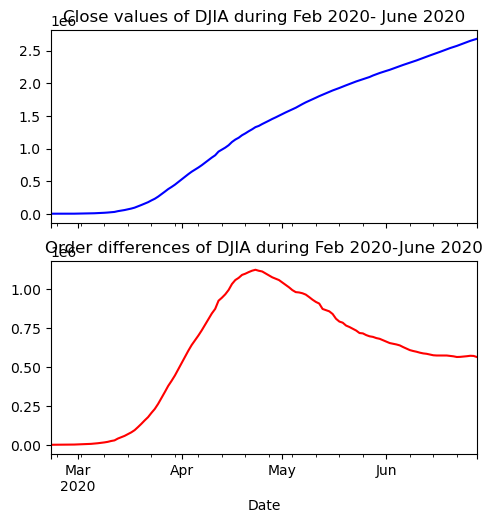

In [40]:
# Visualizing the previous data non stationary with the new one
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
train['Confirmed'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of DJIA during Feb 2020- June 2020')
order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('Order differences of DJIA during Feb 2020-June 2020')

As our data had a continuous increasing tendency we could only see if the data is stationary applying Dickey Fuller test again in which the nlags stablished are 60 since we are working in monthly data.

For the Dickey Fuller test, I will state the next Hypothesys to compare that is the null hypothesis ($H_0$), and the alternative one ($H_A$):


($H_0$): The time series is non-stationary

($H_A$): The time series is stationary

The significance level stablished by default is 0.05

ADF Statistic: -2.867485
p-value: 0.049262


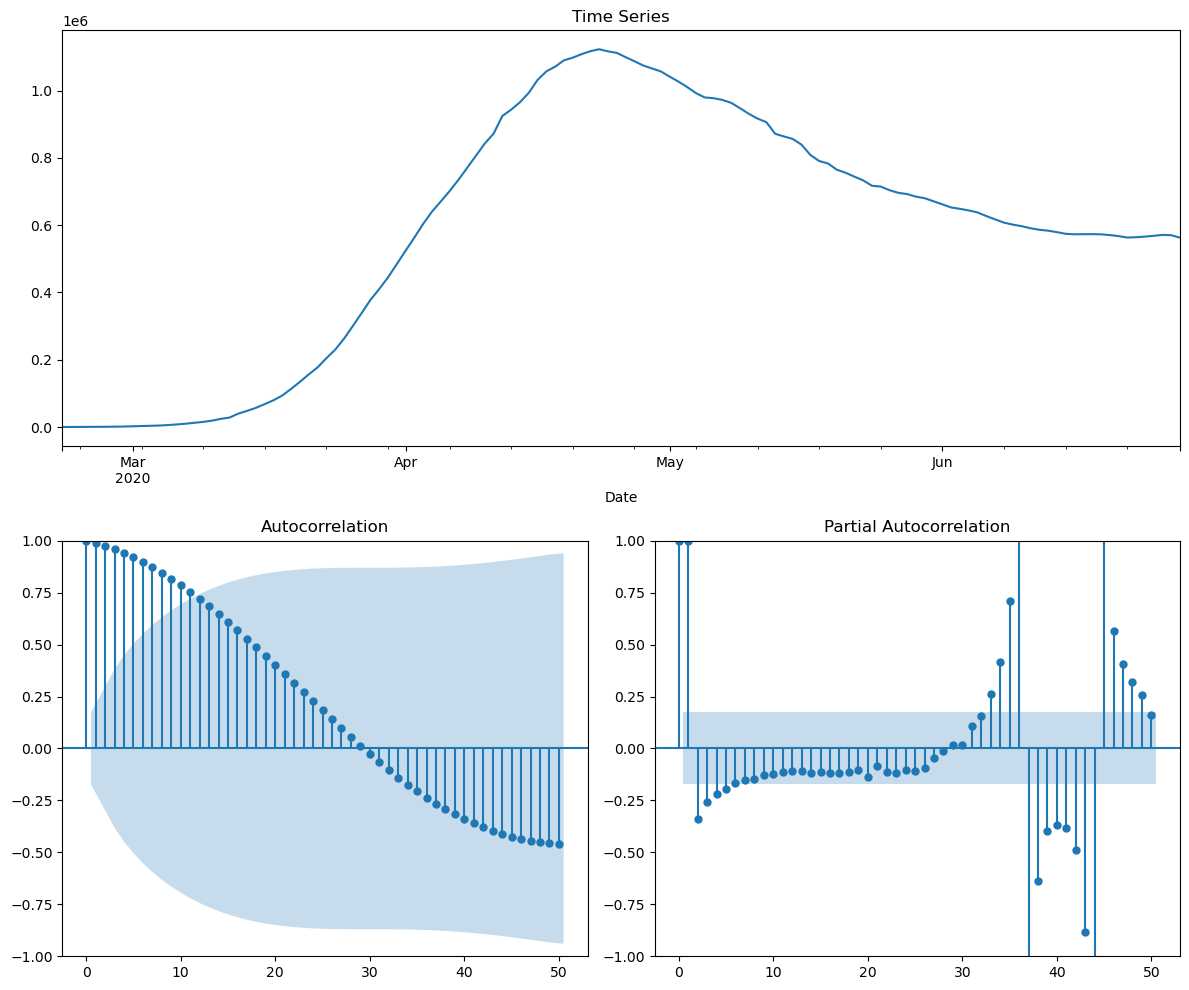

In [41]:
plotds(order_diff, nlag = 60)
adf_result = adfuller(order_diff)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

Now applying the Dickey Fuller Test, we can see that our data is considered stationary 

Now we are going to find which is the best combination for p, d, q, and we are going to train the values with different combinations

In [42]:
# Funtion for applying nested loop to define AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(train['Confirmed'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 3605.273975006168], [0, 1, 1, 3440.0663127686066], [0, 1, 2, 3325.8846817659305], [1, 1, 0, 3087.2326557369656], [1, 1, 1, 3050.6552669597004], [1, 1, 2, 3052.4544952245906], [2, 1, 0, 3060.6674797927717], [2, 1, 1, 3052.3512218895094], [2, 1, 2, 3054.3978043810303], [0, 2, 0, 103313.3296774092], [0, 2, 1, 3030.0096767136274], [0, 2, 2, 3031.853873017359], [1, 2, 0, 3040.47078218187], [1, 2, 1, 3031.6318529756873], [1, 2, 2, 3033.8673886455144], [2, 2, 0, 3034.376366087702], [2, 2, 1, 3032.473243358303], [2, 2, 2, 3004.802459407722]]


The best combination is (2,2,2) because it has the small value according to the AIC values, and now let's train the model with the optimal values.

In [43]:
# Applying the optimal p, d and q in the ARIMA model
arima_obj = ARIMA(train['Confirmed'].tolist(), order = (2, 2, 2))
arima_obj_fit = arima_obj.fit()
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  159
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1497.401
Date:                Thu, 02 Nov 2023   AIC                           3004.802
Time:                        21:11:46   BIC                           3020.084
Sample:                             0   HQIC                          3011.009
                                - 159                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9639      0.038     25.500      0.000       0.890       1.038
ar.L2         -0.3736      0.041     -9.061      0.000      -0.454      -0.293
ma.L1         -1.6899      0.042    -40.074      0.000      -1.773      -1.607
ma.L2          1.0000      0.053     18.856      0.000       0.896       1.104
sigma2      1.078e+07   8.07e-09   1.34e+15      0.000    1.08e+07    1.08e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               672.20
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.01e+29. Standard errors may be unstable.
"""

AIC tells us how accurate we are in our model with this p, d, q combination, and BIC give us information criterium about the dataset, and in the next code we will train again our ARIMA model.

In [44]:
# Showing in a dataframe the Confirmed cases, ARIMA and diffval 
pred = arima_obj_fit.fittedvalues
train['ARIMA'] = pred
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues
train['diffval'] = diffval
train.head()

,Confirmed,ARIMA,diffval
Date,,,
2020-01-22,0,0.000000,0.0
2020-01-23,0,0.000000,0.0
2020-01-24,2,0.000000,2.0
2020-01-25,3,2.949791,3.0
2020-01-26,3,3.743160,3.0


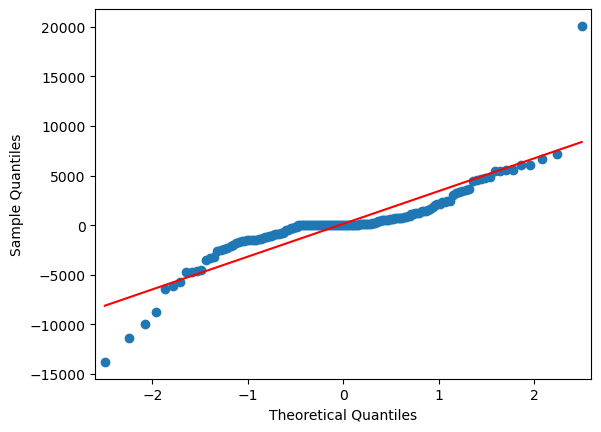

In [45]:
# Showing the new qqplot
x = sm.qqplot(arima_obj_fit.resid, line = 's')

We can see that now our data fits better into our ARIMA model with the new parameters stablished

In [46]:
print(train['diffval'], train['ARIMA'])

Date
2020-01-22          0.0
2020-01-23          0.0
2020-01-24          2.0
2020-01-25          3.0
2020-01-26          3.0
                ...    
2020-06-24    2610439.0
2020-06-25    2629250.0
2020-06-26    2649366.0
2020-06-27    2665549.0
2020-06-28    2681253.0
Name: diffval, Length: 159, dtype: float64 Date
2020-01-22    0.000000e+00
2020-01-23    0.000000e+00
2020-01-24    0.000000e+00
2020-01-25    2.949791e+00
2020-01-26    3.743160e+00
                  ...     
2020-06-24    2.610327e+06
2020-06-25    2.629024e+06
2020-06-26    2.647495e+06
2020-06-27    2.667947e+06
2020-06-28    2.683329e+06
Name: ARIMA, Length: 159, dtype: float64


Text(0, 0.5, 'Closing')

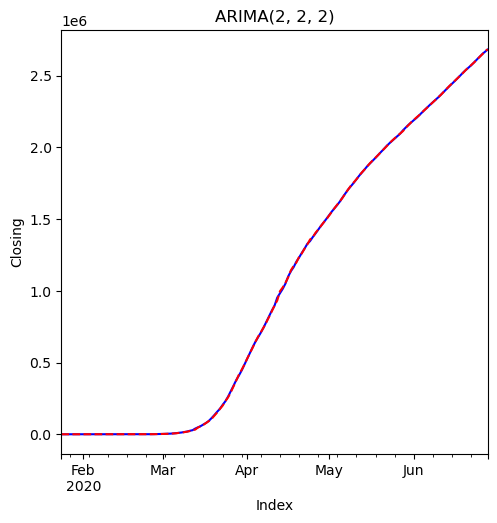

In [47]:
# Showing the ARIMA model with the new p, d, q values
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)
train['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr)
train['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(2, 2, 2)')
plt.xlabel('Index')
plt.ylabel('Closing')

We can see now how our ARIMA model is working in the dataset, if we split between confidence intervals, we can see the next results

In [48]:
# Calculating the Mean Absolut Error for the testing set
from sklearn.metrics import r2_score, mean_absolute_error
train_predictions = arima_obj_fit.predict(start=0, end=len(train) - 1, typ='levels')
test_predictions = arima_obj_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
test_MAE = mean_absolute_error(test['Confirmed'], test_predictions)
print("Mean Absolute Error (MAE):", test_MAE)

Mean Absolute Error (MAE): 67052.63261174184


We can see that appying the Mean Absolut Error of 67070 which are good values and we can say that we have a good model.

## ARIMA Time Series Model splitting 10% for testing and 90% for training

In [49]:
#Starting iterations with ARIMA model
train_size = int(len(covid_ts) * 0.9)
train, test = covid_ts[:train_size], covid_ts[train_size:]
model = ARIMA(train['Confirmed'], order = (1, 1, 0))
results_AR = model.fit()

In [50]:
#Applying function to find the number of differences to apply to make the data stationary
analysis = train['Confirmed']
def adf_test(analysis):
    result = adfuller(analysis, autolag='AIC')
    p_value = result[1]
    return p_value
d = 0
significance_level = 0.05
while True:
    p_value = adf_test(analysis.diff(d).dropna())
    if p_value < significance_level:
        break
    d += 1
print(f"Number of differences to make the series stationary: {d}")

Number of differences to make the series stationary: 22


In [51]:
# Applying the order of differences to make the data stationary
order_diff = train['Confirmed'].diff(22)
order_diff = train['Confirmed'].diff(22).dropna()
order_diff.head()

Date
2020-02-13    54.0
2020-02-14    55.0
2020-02-15    54.0
2020-02-16    53.0
2020-02-17    54.0
Name: Confirmed, dtype: float64

Text(0.5, 1.0, 'Order differences of DJIA during Feb 2020-June 2020')

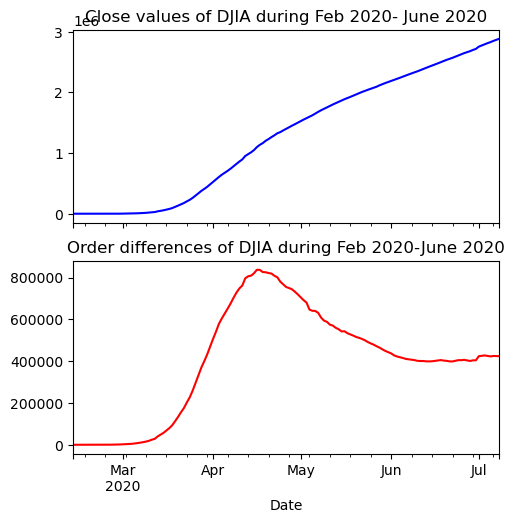

In [52]:
# Visualizing the previous data non stationary with the new one
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
train['Confirmed'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of DJIA during Feb 2020- June 2020')
order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('Order differences of DJIA during Feb 2020-June 2020')

For the Dickey Fuller test, I will state the next Hypothesys to compare that is the null hypothesis ($H_0$), and the alternative one ($H_A$):


($H_0$): The time series is non-stationary

($H_A$): The time series is stationary

The significance level stablished by default is 0.05

ADF Statistic: -3.712638
p-value: 0.003939


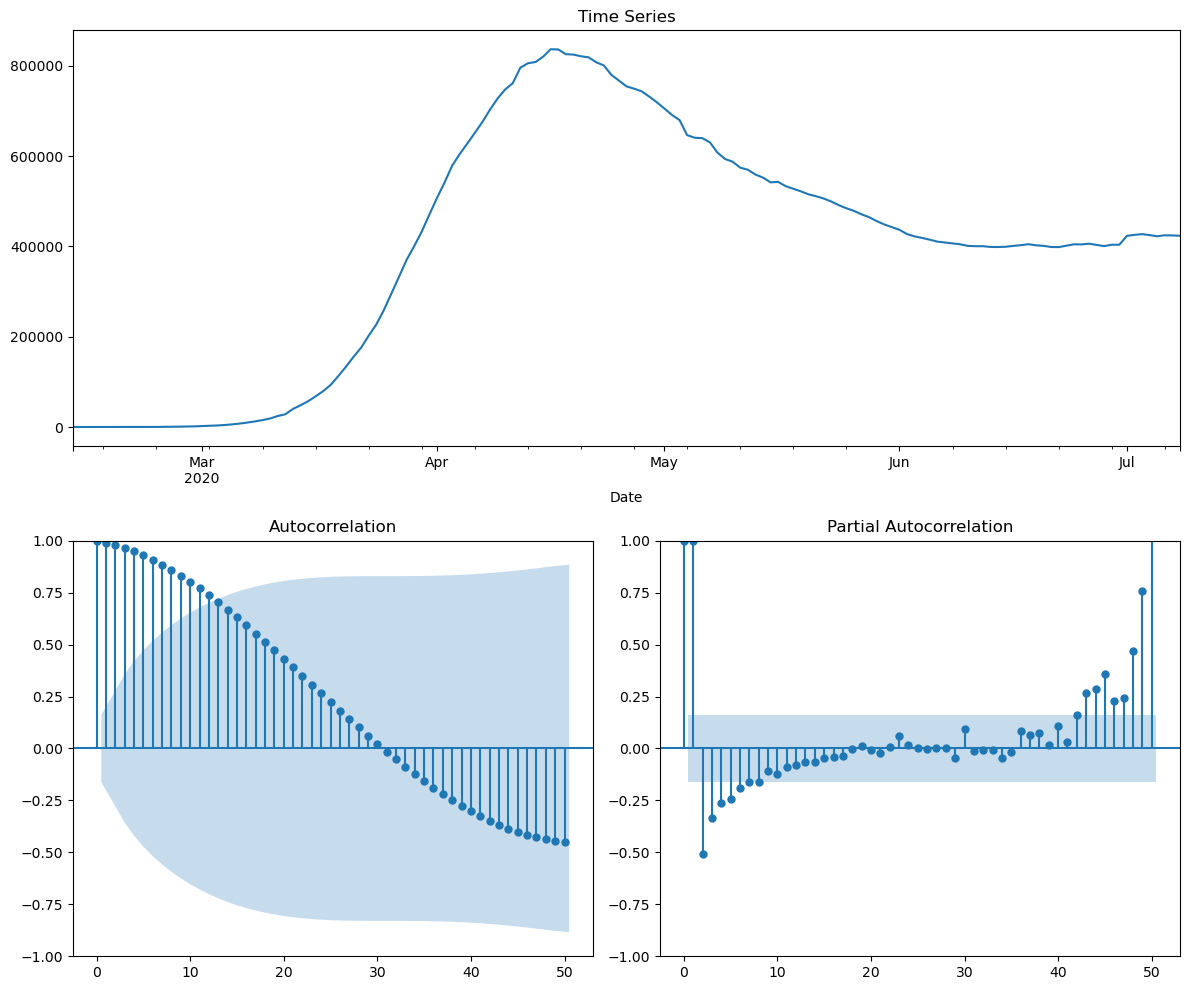

In [53]:
plotds(order_diff, nlag = 60)
adf_result = adfuller(order_diff)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

Now applying the Dickey Fuller Test, we can see that our data is considered stationary 

Now we are going to find which is the best combination for p, d, q, and we are going to train the values with different combinations

In [54]:
# Funtion for applying nested loop to define AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(train['Confirmed'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 3834.6449702040927], [0, 1, 1, 3729.3279299092947], [0, 1, 2, 3570.6415245000617], [1, 1, 0, 3313.309891994917], [1, 1, 1, 3267.1216306800434], [1, 1, 2, 3267.9266305853766], [2, 1, 0, 3276.705403194686], [2, 1, 1, 3268.0697187161622], [2, 1, 2, 3269.967132706293], [0, 2, 0, 23500009366115.8], [0, 2, 1, 3246.211709202263], [0, 2, 2, 3247.1687540300227], [1, 2, 0, 3256.3708809306177], [1, 2, 1, 3247.140250521634], [1, 2, 2, 3249.2216245819272], [2, 2, 0, 3251.51737147207], [2, 2, 1, 3248.892225763081], [2, 2, 2, 3251.163562200906]]


The best combination is (0,2,1) because it has the small value according to the AIC values, and now let's train the model with the optimal values.

In [55]:
# Applying the optimal p, d and q in the ARIMA model
arima_obj = ARIMA(train['Confirmed'].tolist(), order = (0, 2, 1))
arima_obj_fit = arima_obj.fit()
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  169
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1621.106
Date:                Thu, 02 Nov 2023   AIC                           3246.212
Time:                        21:11:48   BIC                           3252.448
Sample:                             0   HQIC                          3248.743
                                - 169                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5404      0.041    -13.149      0.000      -0.621      -0.460
sigma2      1.593e+07   8.09e+05     19.687      0.000    1.43e+07    1.75e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):               470.43
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               3.99   Skew:                             0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AIC tells us how accurate we are in our model with this pdq combination, and BIC give us information criterium about the dataset, and in the next code we will train again our ARIMA model.

In [56]:
# Showing in a dataframe the Confirmed cases, ARIMA and diffval 
pred = arima_obj_fit.fittedvalues
train['ARIMA'] = pred
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues
train['diffval'] = diffval
train.head()

,Confirmed,ARIMA,diffval
Date,,,
2020-01-22,0,0.000000,0.0
2020-01-23,0,0.000000,0.0
2020-01-24,2,0.000000,2.0
2020-01-25,3,2.946750,3.0
2020-01-26,3,3.971437,3.0


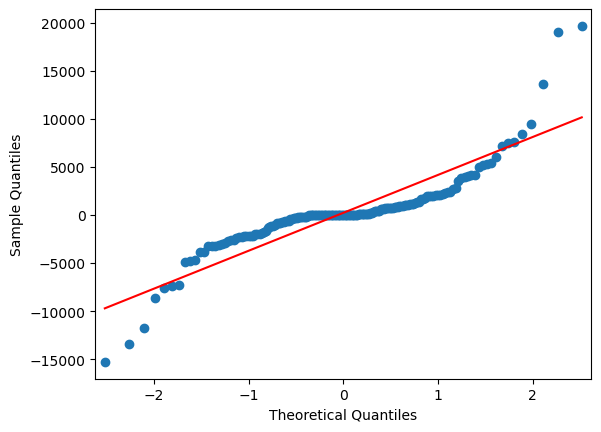

In [57]:
# Showing the new qqplot
x = sm.qqplot(arima_obj_fit.resid, line = 's')

We can see that now our data fits better into our ARIMA model with the new parameters stablished

In [58]:
print(train['diffval'], train['ARIMA'])

Date
2020-01-22          0.0
2020-01-23          0.0
2020-01-24          2.0
2020-01-25          3.0
2020-01-26          3.0
                ...    
2020-07-04    2813781.0
2020-07-05    2830582.0
2020-07-06    2850929.0
2020-07-07    2868394.0
2020-07-08    2886022.0
Name: diffval, Length: 169, dtype: float64 Date
2020-01-22    0.000000e+00
2020-01-23    0.000000e+00
2020-01-24    0.000000e+00
2020-01-25    2.946750e+00
2020-01-26    3.971437e+00
                  ...     
2020-07-04    2.818582e+06
2020-07-05    2.833824e+06
2020-07-06    2.849135e+06
2020-07-07    2.870306e+06
2020-07-08    2.886892e+06
Name: ARIMA, Length: 169, dtype: float64


Text(0, 0.5, 'Closing')

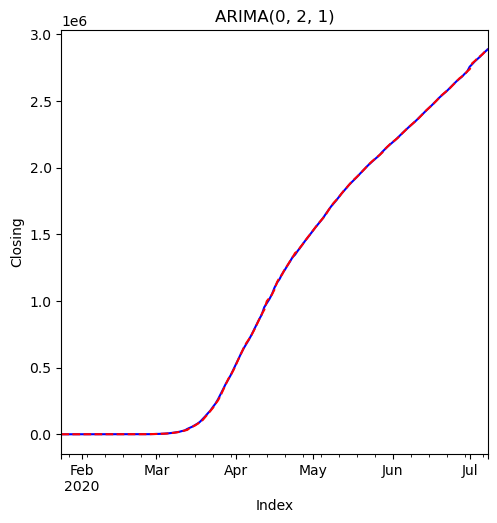

In [59]:
# Showing the ARIMA model with the new p, d, q values
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)
train['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr)
train['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(0, 2, 1)')
plt.xlabel('Index')
plt.ylabel('Closing')

In [60]:
# Calculating the Mean Absolut Error for the testing set
from sklearn.metrics import r2_score, mean_absolute_error
train_predictions = arima_obj_fit.predict(start=0, end=len(train) - 1, typ='levels')
test_predictions = arima_obj_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
test_MAE = mean_absolute_error(test['Confirmed'], test_predictions)
print("Mean Absolute Error (MAE):", test_MAE)

Mean Absolute Error (MAE): 34248.144607243325


We can see that appying the Mean Absolut Error around 34248.14 which are good values and we can say that we have a good model. 

## ARIMA Time Series Model splitting 20% for testing and 80% for training

In [61]:
#Starting iterations with ARIMA model
train_size = int(len(covid_ts) * 0.8)
train, test = covid_ts[:train_size], covid_ts[train_size:]
model = ARIMA(train['Confirmed'], order = (1, 1, 0))
results_AR = model.fit()

In [62]:
#Applying function to find the number of differences to apply to make the data stationary
analysis = train['Confirmed']
def adf_test(analysis):
    result = adfuller(analysis, autolag='AIC')
    p_value = result[1]
    return p_value
d = 0
significance_level = 0.05
while True:
    p_value = adf_test(analysis.diff(d).dropna())
    if p_value < significance_level:
        break
    d += 1
print(f"Number of differences to make the series stationary: {d}")

Number of differences to make the series stationary: 13


In [63]:
# Applying the order of differences to make the data stationary
order_diff = train['Confirmed'].diff(13)
order_diff = train['Confirmed'].diff(13).dropna()
order_diff.head()

Date
2020-02-04    34.0
2020-02-05    35.0
2020-02-06    33.0
2020-02-07    34.0
2020-02-08    43.0
Name: Confirmed, dtype: float64

Text(0.5, 1.0, 'Order differences of DJIA during Feb 2020-June 2020')

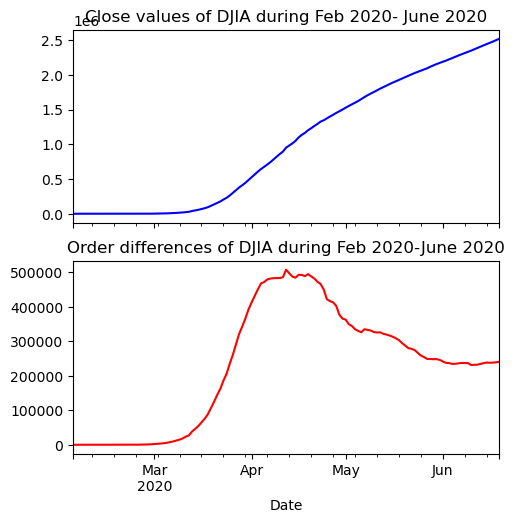

In [64]:
# Visualizing the previous data non stationary with the new one
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
train['Confirmed'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of DJIA during Feb 2020- June 2020')
order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('Order differences of DJIA during Feb 2020-June 2020')

For the Dickey Fuller test, I will state the next Hypothesys to compare that is the null hypothesis ($H_0$), and the alternative one ($H_A$):


($H_0$): The time series is non-stationary

($H_A$): The time series is non-stationary

The significance level stablished by default is 0.05

ADF Statistic: -2.878990
p-value: 0.047846


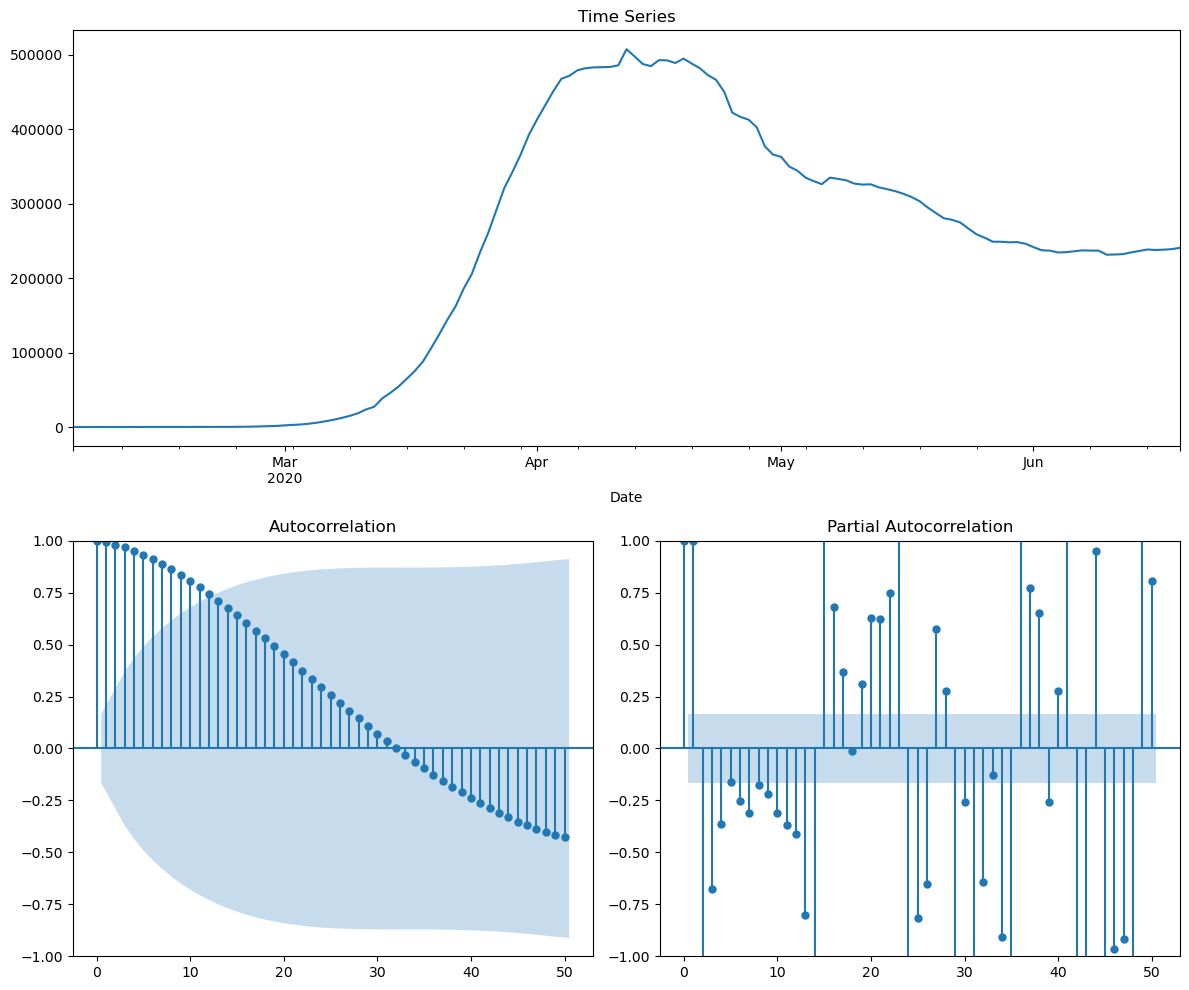

In [65]:
plotds(order_diff, nlag = 60)
adf_result = adfuller(order_diff)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

Now applying the Dickey Fuller Test, we can see that our data is considered stationary 

Now we are going to find which is the best combination for p, d, q, and we are going to train the values with different combinations

In [66]:
# Funtion for applying nested loop to define AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(train['Confirmed'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 3402.570379897476], [0, 1, 1, 3248.2346683301143], [0, 1, 2, 3139.243203115524], [1, 1, 0, 2918.7682293469848], [1, 1, 1, 2883.90120470294], [1, 1, 2, 2885.593020692284], [2, 1, 0, 2893.2661411921963], [2, 1, 1, 2885.3572316501004], [2, 1, 2, 2887.591652968958], [0, 2, 0, 18150643656042.965], [0, 2, 1, 2863.1450390302343], [0, 2, 2, 2864.879513812697], [1, 2, 0, 2872.8903626832443], [1, 2, 1, 2864.6904759039535], [1, 2, 2, 2866.9614585728964], [2, 2, 0, 2867.1757558699946], [2, 2, 1, 2865.573657628241], [2, 2, 2, 2846.0435144654184]]


The best combination is (2,2,2) because it has the small value according to the AIC values, and now let's train the model with the optimal values.

In [67]:
# Applying the optimal p, d and q in the ARIMA model
arima_obj = ARIMA(train['Confirmed'].tolist(), order = (2, 2, 2))
arima_obj_fit = arima_obj.fit()
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1418.022
Date:                Thu, 02 Nov 2023   AIC                           2846.044
Time:                        21:11:51   BIC                           2861.030
Sample:                             0   HQIC                          2852.132
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9692      0.065     15.001      0.000       0.843       1.096
ar.L2         -0.3735      0.063     -5.963      0.000      -0.496      -0.251
ma.L1         -1.6730      0.066    -25.256      0.000      -1.803      -1.543
ma.L2          0.9790      0.075     13.050      0.000       0.832       1.126
sigma2      1.525e+07   6.97e-09   2.19e+15      0.000    1.52e+07    1.52e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               576.85
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):              18.98   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.91e+30. Standard errors may be unstable.
"""

AIC tells us how accurate we are in our model with this pdq combination, and BIC give us information criterium about the dataset, and in the next code we will train again our ARIMA model.

In [68]:
# Showing in a dataframe the Confirmed cases, ARIMA and diffval 
pred = arima_obj_fit.fittedvalues
train['ARIMA'] = pred
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues
train['diffval'] = diffval
train.head()

,Confirmed,ARIMA,diffval
Date,,,
2020-01-22,0,0.000000,0.0
2020-01-23,0,0.000000,0.0
2020-01-24,2,0.000000,2.0
2020-01-25,3,2.954785,3.0
2020-01-26,3,3.750745,3.0


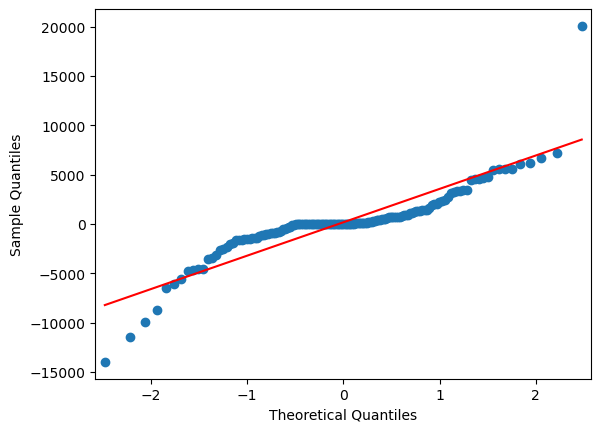

In [69]:
# Showing the new qqplot
x = sm.qqplot(arima_obj_fit.resid, line = 's')

We can see that now our data fits better into our ARIMA model with the new parameters stablished

In [70]:
print(train['diffval'], train['ARIMA'])

Date
2020-01-22          0.0
2020-01-23          0.0
2020-01-24          2.0
2020-01-25          3.0
2020-01-26          3.0
                ...    
2020-06-15    2443902.0
2020-06-16    2462281.0
2020-06-17    2481193.0
2020-06-18    2500695.0
2020-06-19    2520961.0
Name: diffval, Length: 150, dtype: float64 Date
2020-01-22    0.000000e+00
2020-01-23    0.000000e+00
2020-01-24    0.000000e+00
2020-01-25    2.954785e+00
2020-01-26    3.750745e+00
                  ...     
2020-06-15    2.445544e+06
2020-06-16    2.463143e+06
2020-06-17    2.481178e+06
2020-06-18    2.499548e+06
2020-06-19    2.518667e+06
Name: ARIMA, Length: 150, dtype: float64


Text(0, 0.5, 'Closing')

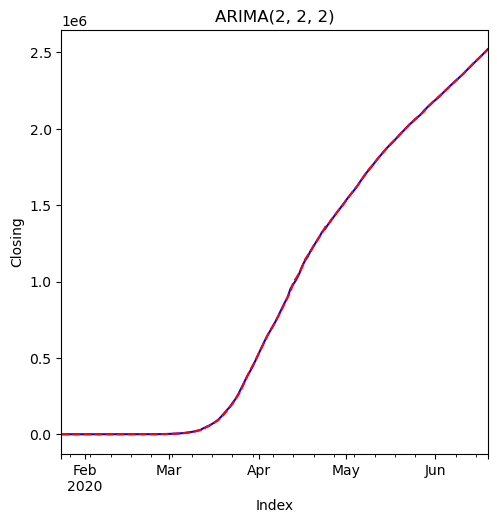

In [71]:
# Showing the ARIMA model with the new p, d, q values
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)
train['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr)
train['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(2, 2, 2)')
plt.xlabel('Index')
plt.ylabel('Closing')

In [72]:
# Calculating the Mean Absolut Error for the testing set
from sklearn.metrics import r2_score, mean_absolute_error
train_predictions = arima_obj_fit.predict(start=0, end=len(train) - 1, typ='levels')
test_predictions = arima_obj_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
test_MAE = mean_absolute_error(test['Confirmed'], test_predictions)
print("Mean Absolute Error (MAE):", test_MAE)

Mean Absolute Error (MAE): 9713.731559210739


We can see that appying the  Mean Absolut Error around 9713.73 which are good values and we can say that we have a good model. 

In the previous ARIMA model, we got predictions and calculated the Mean Absolut Error; however, as the dates were aggregated, the number of rows reduced and that is why we are going to annalyze the European continent but going inside being a little bit more specifics with the countries in it; so, our dataset will have a lot of rows to be annalyzed and make our model perform optimally. 

## Applying different techniques of Regression Machine Learning Models

Before working in the next Machine Learning models with the modeling we will replace our Categorical data into Numerical data and drop the column date.

In [73]:
covid_df = cov_df[cov_df['WHO Region'] == 'Europe']
covid_df = covid_df.drop("Date", axis=1)
covid_df.head()

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,Continent
1,Albania,41.1533,20.1683,0,0,0,0,Europe,Europe
3,Andorra,42.5063,1.5218,0,0,0,0,Europe,Europe
7,Armenia,40.0691,45.0382,0,0,0,0,Europe,Asia
16,Austria,47.5162,14.5501,0,0,0,0,Europe,Europe
17,Azerbaijan,40.1431,47.5769,0,0,0,0,Europe,Asia


In [74]:
covid_df.shape

(15040, 9)

In [75]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a la columna específica

covid_df['Country/Region'] = label_encoder.fit_transform(covid_df['Country/Region'])
covid_df['WHO Region'] = label_encoder.fit_transform(covid_df['WHO Region'])
covid_df['Continent'] = label_encoder.fit_transform(covid_df['Continent'])

In [76]:
covid_df = covid_df.reset_index(drop=True)
covid_cop = covid_df.copy()
covid_df.head()

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region,Continent
0,0,41.1533,20.1683,0,0,0,0,0,1
1,1,42.5063,1.5218,0,0,0,0,0,1
2,2,40.0691,45.0382,0,0,0,0,0,0
3,3,47.5162,14.5501,0,0,0,0,0,1
4,4,40.1431,47.5769,0,0,0,0,0,0


We ca observe that all the categorical data now is numerical.

## Robust Scaler

In [77]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
scaled_data = robust.fit_transform(covid_df)
covid_df = pd.DataFrame(scaled_data, columns=['Country/Region', 'Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'WHO Region', 'Continent'])
print(covid_df)

       Country/Region       Lat      Long  Confirmed    Deaths  Recovered  \
0           -0.942149 -0.101856  0.207730  -0.049822 -0.029126  -0.024052   
1           -0.909091 -0.013966 -0.370662  -0.049822 -0.029126  -0.024052   
2           -0.876033 -0.172286  0.979164  -0.049822 -0.029126  -0.024052   
3           -0.842975  0.311477  0.033460  -0.049822 -0.029126  -0.024052   
4           -0.809917 -0.167479  1.057912  -0.049822 -0.029126  -0.024052   
...               ...       ...       ...        ...       ...        ...   
15035        0.842975 -1.578565 -2.422921  -0.047667 -0.019417  -0.018950   
15036        0.842975 -1.365932 -2.644950  -0.023160 -0.009709   0.002187   
15037        0.842975 -6.139858 -2.264216  -0.046321 -0.029126  -0.014577   
15038       -0.446281  0.270487 -2.164717  -0.048744 -0.029126  -0.023324   
15039        0.743802 -0.250764  1.793032   1.898606  0.553398   4.369534   

         Active  WHO Region  Continent  
0     -0.036870         0.0       

## PCA

We will apply the PCA for the Confirmed cases

In [78]:
#Dropping our dependent variable to apply the PCA
covid_df_no_label =  covid_df.drop(["Confirmed"], axis = 1)
covid_df_no_label.shape

(15040, 8)

In [79]:
pca = PCA().fit(covid_df_no_label) 

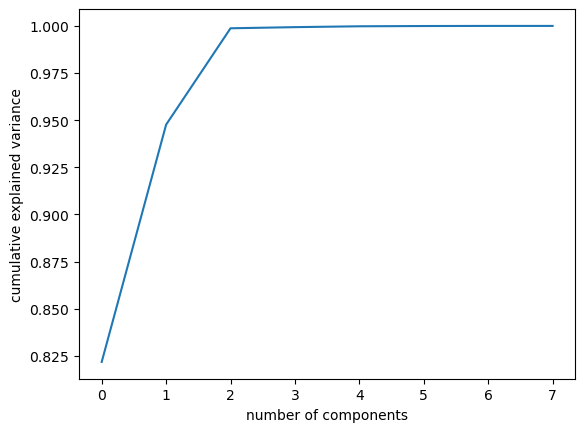

In [80]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');

In [81]:
pca = PCA(n_components=0.995)
pca.fit(covid_df_no_label)
n_components = pca.n_components_
print(n_components)

3


In [82]:
pca = PCA(3)
projected = pca.fit_transform(covid_df_no_label)

In [83]:
projected.shape

(15040, 3)

In [84]:
col_shape = [f"C{i}"for i in range (1,4)]
covid_df_no_label = pd.DataFrame(projected, columns=col_shape)

In [85]:
covid_df_no_label.head()

,C1,C2,C3
0,-14.889389,-2.193532,-0.811843
1,-14.889624,-2.198875,-0.816928
2,-14.889337,-2.180916,-0.807825
3,-14.888182,-2.193728,-0.809788
4,-14.889196,-2.180099,-0.806700


In [86]:
covid_df_no_label["Confirmed"] = covid_cop["Confirmed"]


In [87]:
covid_df_no_label.head(10)

,C1,C2,C3,Confirmed
0,-14.889389,-2.193532,-0.811843,0
1,-14.889624,-2.198875,-0.816928,0
2,-14.889337,-2.180916,-0.807825,0
3,-14.888182,-2.193728,-0.809788,0
4,-14.889196,-2.180099,-0.806700,0
5,-14.886488,-2.188193,-0.801890,0
6,-14.887720,-2.195984,-0.810803,0
7,-14.888714,-2.193552,-0.810184,0
8,-14.888701,-2.191437,-0.808193,0
9,-14.888492,-2.194003,-0.810061,0


In [88]:
covid_df_no_label.shape

(15040, 4)

In [89]:
import ppscore as pps
pps_matrix = pps.matrix(cov_df)
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Country/Region,Country/Region,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Country/Region,Lat,0.847996,regression,True,mean absolute error,19.586566,2.977237,DecisionTreeRegressor()
2,Country/Region,Long,0.878362,regression,True,mean absolute error,55.857974,6.794460,DecisionTreeRegressor()
3,Country/Region,Date,0.000000,classification,True,weighted F1,0.005000,0.000350,DecisionTreeClassifier()
4,Country/Region,Confirmed,0.000000,regression,True,mean absolute error,14265.976600,16103.648362,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
95,Continent,Deaths,0.000000,regression,True,mean absolute error,729.518400,1252.435642,DecisionTreeRegressor()
96,Continent,Recovered,0.000000,regression,True,mean absolute error,7048.629400,11581.444769,DecisionTreeRegressor()
97,Continent,Active,0.000000,regression,True,mean absolute error,6511.748000,10889.163179,DecisionTreeRegressor()
98,Continent,WHO Region,0.718948,classification,True,weighted F1,0.200200,0.775215,DecisionTreeClassifier()


## Applying diffent Machine Learning Methods

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## Defining the variables

In [91]:
from sklearn.model_selection import train_test_split

X = covid_df_no_label.drop('Confirmed', axis=1)
y = covid_df_no_label['Confirmed']

### Hyperparameter tuning with KNeighbors Regressor

We will do the Hyperparameter tuning with the models KNeighbors Regressor and Linear Regression because we have numerical variables.

### Applying the 10, 15 and 20% of testing and 90, 85 and 80 % training

In [92]:
test_split_percentages = [0.10, 0.15, 0.20]

for test_size in test_split_percentages:
    # Split the data into training and validation sets
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=test_size, random_state=1)
    
    # Define the parameter grid for grid search
    parameters = {
        'n_neighbors': range(1, 9),
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
    
    # Create KNN regressor
    knn = KNeighborsRegressor()
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Set up Grid Search
    grid = GridSearchCV(knn, parameters, cv=5, scoring='neg_mean_absolute_error')
    
    # Fit the grid search
    grid.fit(X_train, y_train)
    
    # Get the best hyperparameters
    best_params = grid.best_params_
    print(f"Best Hyperparameters for {int(test_size * 100)}% Test Split: {best_params}")
    
    # Get the best model
    best_model = grid.best_estimator_
    
    # Evaluate the Model
    y_pred = best_model.predict(X_validation)
    mae = mean_absolute_error(y_validation, y_pred)
    print(f"Mean Absolute Error for {int(test_size * 100)}% Test Split: {mae}")
    
    accuracy = best_model.score(X_validation, y_validation)
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")


Best Hyperparameters for 10% Test Split: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Mean Absolute Error for 10% Test Split: 60.12953453127942
Accuracy for 10% Test Split: 0.9999459806855879


Best Hyperparameters for 15% Test Split: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Mean Absolute Error for 15% Test Split: 61.66629120660229
Accuracy for 15% Test Split: 0.9999561649430656


Best Hyperparameters for 20% Test Split: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Mean Absolute Error for 20% Test Split: 71.47753792892844
Accuracy for 20% Test Split: 0.9999358671718276




### Hyperparameter tuning with Linear Regression

### Applying the 10, 15 and 20% of testing and 90, 85 and 80 % training

Best Model for 10% Test Split:
LinearRegression()
Mean Absolute Error for 10% Test Split: 30.62093577476938
Accuracy for 10% Test Split: 0.9999993897272743




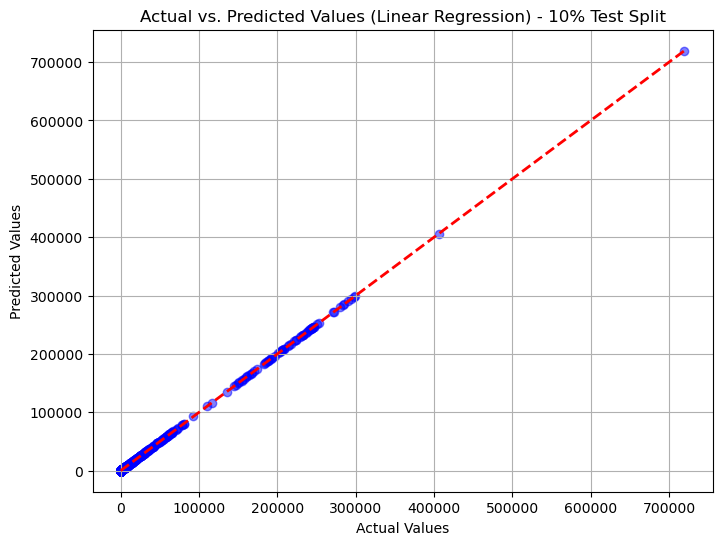

Best Model for 15% Test Split:
LinearRegression()
Mean Absolute Error for 15% Test Split: 30.283597925186587
Accuracy for 15% Test Split: 0.9999994604537477




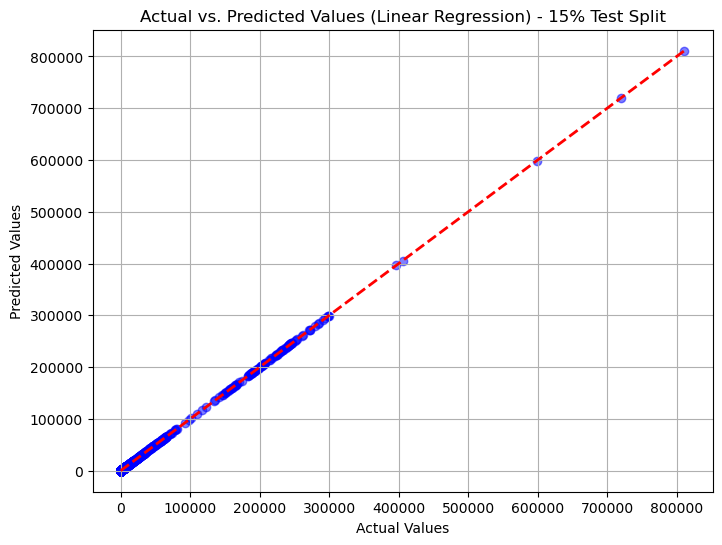

Best Model for 20% Test Split:
LinearRegression()
Mean Absolute Error for 20% Test Split: 30.103898938529575
Accuracy for 20% Test Split: 0.9999994369857816




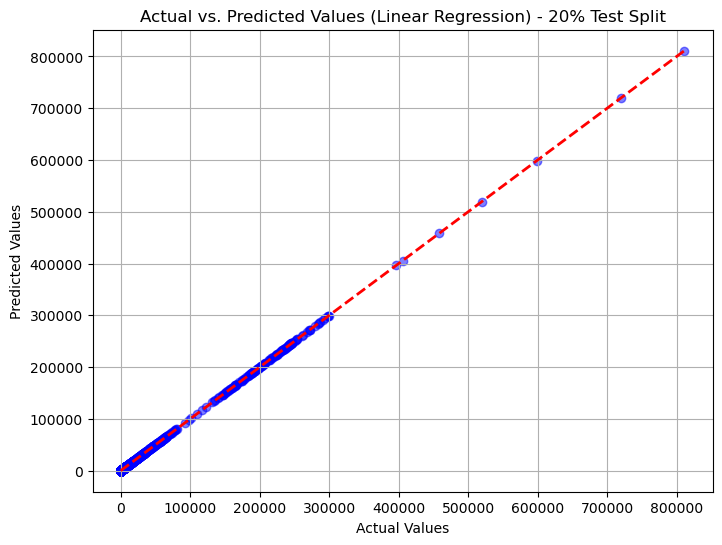

In [93]:
from sklearn.linear_model import LinearRegression
# List of test split ratios
test_split_percentages = [0.10, 0.15, 0.20]

for test_size in test_split_percentages:
    # Split the data into training and validation sets
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=test_size, random_state=1)
    
    # Create a Linear Regression model
    linear_regressor = LinearRegression()
    
    # Set up parameter grid (empty for Linear Regression, as it doesn't have hyperparameters to tune)
    parameter_grid = {}
    
    # Set up Grid Search
    grid = GridSearchCV(linear_regressor, parameter_grid, cv=5, scoring='neg_mean_absolute_error')
    
    # Fit the grid search
    grid.fit(X_train, y_train)
    
    # Get the best model
    model = grid.best_estimator_
    
    # Evaluate the Model
    y_predict = model.predict(X_validation)
    mae = mean_absolute_error(y_validation, y_predict)
    
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(model)
    
    print(f"Mean Absolute Error for {int(test_size * 100)}% Test Split: {mae}")
    
    accuracy = model.score(X_validation, y_validation)
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")
# Create a scatter plot for this test split
    plt.figure(figsize=(8, 6))
    plt.scatter(y_validation, y_predict, color='blue', alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs. Predicted Values (Linear Regression) - {int(test_size * 100)}% Test Split')
    plt.grid(True)
    
    # Add a diagonal line for reference
    plt.plot([min(y_validation), max(y_validation)], [min(y_validation), max(y_validation)], color='red', linestyle='--', lw=2)
    
    plt.show()    

## Results

The results obtained applying ARIMA, Random Forest Regressor, and Linear Regression are shown in the next table:

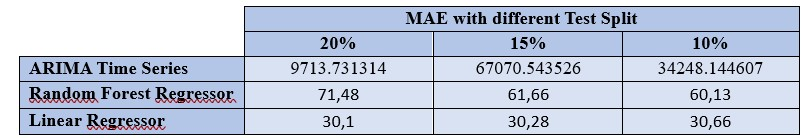

In [1]:
from IPython.display import Image
Image(filename =r'Image_Results_Table.jpg')

As we are applying regression models, the metric utilized to compare them was the Mean Absolut Error (MAE). 
When we use the MAE to compare between the models, we are looking for the one that has the lowest error between them and in this case Linear Regression Model has a very low MAE around 30 in the 3 different test splits done for this analysis.

## Conclutions

The conclusions found are the next:
- Applying Time Series models in this dataset is not recommended since the shape of the data is very reduced due to many countries have the same date as rows and creating fictitious data could lead into variance in the model. However, we got good results as predictions.
- Regression models were applied like Random Forest Regressor and Linear Regression obtaining good accuracies in both, with low errors making both good models for predictions.
- Linear Regression is the best model for predictions in this dataset. However, as it is well known Covid 19 pandemic during this time had an increasing trend and we know that as every pandemic it has a moment when this trend changes and starts decreasing that is why we would recommend that Random Forest Regressor is the best model to apply considering that the MAE is low, but also considering future changes in COVID cases.
- After analysing this models, we could accomplish the principal question formulated using different training and tests splits in the data, finding the best model for prediction in “Confirmed” cases of Covid in Europe (WHO Region).